<a href="https://colab.research.google.com/github/LeeJaeEun0/PlayData_230117/blob/main/230115_ch06_DL_01_%EC%9E%90%EC%97%B0%EC%96%B4%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토큰화(Tokenization)
* 주어진 텍스트를 단어 또는 문자 단위로 자르는 것을 토큰화라고 함 - 잘려진 단위가 토큰
* 파이썬의 기본 함수인 str.split() 메소드로 토큰화 가능
* 영어의 경우 토큰화를 위해 사용하는 도구로 spaCy와 NLTK

In [ ]:
en_text = "A Dog Run back corner near spare bedrooms"

## spaCy 사용하기

In [ ]:
# https://spacy.io/models
import spacy
spacy_en = spacy.load('en_core_web_sm')

In [ ]:
def tokenize(en_text):
    # return [tok.text for tok in spacy_en.tokenizer(en_text)]
    return [tok.text for tok in spacy_en(en_text).noun_chunks] # 명사만

In [ ]:
tokenize(en_text)

['A Dog', 'back corner', 'spare bedrooms']

In [ ]:
!python -m spacy download ko_core_news_sm
spacy_ko = spacy.load('ko_core_news_sm')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-16 05:18:11.138441: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 19.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ko_core_news_sm')


In [ ]:
def tokenize_ko(ko_text):
    # return [tok.text for tok in spacy_ko.tokenizer(ko_text)]
    return [tok.tag for tok in spacy_ko(ko_text)] # 명사만

In [ ]:
ko_test="드러나는 배후세력'빌라왕 김씨' 공범 16명 확인"

In [ ]:
tokenize_ko(ko_test)

['드러나는', '배후세력', "'", '빌라왕', '김씨', "'", '공범', '16명', '확인']

# NLTK 사용하기

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize(en_text)

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']

# 띄어쓰기 토큰화

In [ ]:
en_text.split()

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']

# 한국어 띄어쓰기 토큰화

* 영어의 경우는 띄어쓰기 단위로 토큰화를 해도, 단어들을 각 구분이 꽤 명확하기 때문에 토큰화 작업이 수월
* 하지만 한국어의 경우에는 (띄어쓰기를 통한) 토큰화 작업이 훨씬 까다로움 -> 한국어는 (어간)조사, 접사 등으로 의미 표현 -> 단순 띄어쓰리로 단위를 나누면, 같은 단어가 다른 단어로 인식되어서 단어 집합(vocabluary)의 크기가 불필요하게 커짐
  * 단어 집합(vocablulary): 중복을 제거한 텍스트의 총 단어의 집합 (set) 의미

In [ ]:
kor_text = '사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지를 사왔어'

In [ ]:
kor_text.split()

['사과의',
 '놀라운',
 '효능이라는',
 '글을',
 '봤어.',
 '그래서',
 '오늘',
 '사과를',
 '먹으려고',
 '했는데',
 '사과가',
 '썩어서',
 '슈퍼에',
 '가서',
 '사과랑',
 '오렌지를',
 '사왔어']

## 형태소 토큰화
* 위와 같은 상황을 방지하기 위해서 한국어는 보편적으로 '형태소 분석기'로 토큰화
* 형태소 분석기 중에서 mecab 사용/ okt

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 13.41 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-01-16 05:18:26--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302

In [ ]:
# https://konlpy.org/ko/latest/index.html
from konlpy.tag import Mecab
tokenizer = Mecab()

In [ ]:
tokenizer.morphs(kor_text) # 모두 쪼개기

['사과',
 '의',
 '놀라운',
 '효능',
 '이',
 '라는',
 '글',
 '을',
 '봤',
 '어',
 '.',
 '그래서',
 '오늘',
 '사과',
 '를',
 '먹',
 '으려고',
 '했',
 '는데',
 '사과',
 '가',
 '썩',
 '어서',
 '슈퍼',
 '에',
 '가',
 '서',
 '사과',
 '랑',
 '오렌지',
 '를',
 '사',
 '왔',
 '어']

In [ ]:
tokenizer.nouns(kor_text) # 조사 등 제외

['사과', '효능', '글', '사과', '사과', '슈퍼', '사과', '오렌지']

## 문자 토큰화

In [ ]:
list(en_text)

['A',
 ' ',
 'D',
 'o',
 'g',
 ' ',
 'R',
 'u',
 'n',
 ' ',
 'b',
 'a',
 'c',
 'k',
 ' ',
 'c',
 'o',
 'r',
 'n',
 'e',
 'r',
 ' ',
 'n',
 'e',
 'a',
 'r',
 ' ',
 's',
 'p',
 'a',
 'r',
 'e',
 ' ',
 'b',
 'e',
 'd',
 'r',
 'o',
 'o',
 'm',
 's']

In [ ]:
for c in en_text:
    print(c)

A
 
D
o
g
 
R
u
n
 
b
a
c
k
 
c
o
r
n
e
r
 
n
e
a
r
 
s
p
a
r
e
 
b
e
d
r
o
o
m
s


# 단어 집합(Vocabulary) 생성
* 단어 집합(Vocabulary): 중복을 제거한 텍스트의 총 단어 집합(set) 의미
* 네이버 영화 리뷰 데이터: 총 20만개의 영화 리뷰를 긍정1, 부정0으로 레이블링한 데이터

In [ ]:
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist # 빈도 수 세기
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_table("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", index_col=0)

In [ ]:
df

,document,label
id,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...
8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
3302770,쓰.레.기,0
5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0


In [ ]:
sample_data = df.head(100) # 임의로 100개만

In [ ]:
# 정규표현식을 통해 데이터를 정제
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
sample_data['document'] # 한글, 공백 제외하고 모두 제거

<ipython-input-59-09a5302459f3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
<ipython-input-59-09a5302459f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")


id
8112052                                   어릴때보고 지금다시봐도 재밌어요ㅋㅋ
8132799     디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...
4655635                      폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고
9251303      와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지
10067386                           안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화
                                  ...                        
3908729                                  진짜 최고다 최고 성룡형님 마이 우상
6318878                당신이 좋아하는 장르는 뭐요 이영화에도 저영화에도 이런장르는 싫다니원
2620222                                        지금까지 본영화중에 최고다
5954450                 매회리타가자꾸거슬려서죽었으면좋겠다고생각했는데ㅠㅠ죄책감에나도잠못이룬다
9754970     어릴 때보고 커서 다시 봤는데 진짜 잘 만든 영화였네 웃음과 감동을 잘 이어 붙였고...
Name: document, Length: 100, dtype: object

* 토큰화 수행
* 토큰화 과정에서 불용어를 제거하기 위해서 불용어를 우선 정의

In [ ]:
# 불용어 정의
stopwords=[
    '의','가','이','은','들','는','좀','잘',
    '걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# 형태소 분석기는 mecab을 사용
tokenizer = Mecab()
tokenized = []
for sentence in sample_data.document:
  temp = tokenizer.morphs(str(sentence)) # 형태소 기반 토큰을
  temp = [word for word in temp if not word in stopwords] # 불용어 제거
  tokenized.append(temp)

In [ ]:
tokenized

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우',
  '학생',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '해',
  '문화',
  '산업',
  '부러웠',
  '는데',
  '사실',
  '우리',
  '나라',
  '에서',
  '그',
  '어려운',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지킨',
  '노라노',
  '같',
  '전통',
  '있',
  '어',
  '저',
  '같',
  '사람',
  '꿈',
  '을',
  '꾸',
  '고',
  '이뤄나갈',
  '수',
  '있',
  '다는',
  '것',
  '감사',
  '합니다'],
 ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'],
 ['연기',
  '진짜',
  '개',
  '쩔',
  '구나',
  '지루',
  '할거',
  '라고',
  '생각',
  '했',
  '는데',
  '몰입',
  '해서',
  '봤',
  '다',
  '그래',
  '이런',
  '게',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'],
 ['사랑',
  '을',
  '해',
  '본',
  '사람',
  '라면',
  '처음',
  '부터',
  '끝',
  '까지',
  '웃',
  '을',
  '수',
  '있',
  '영화'],
 ['완전', '감동', '입니다', '다시', '봐도', '감동'],
 ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'],
 ['굿'],
 ['바보', '아니', '라', '병', '쉰', '인', '듯'],
 ['내',
  '나

In [ ]:
# 단어 집합 만들기
# NLTK에서는 빈도수 계산 도구인 FreqDist()를 지원
vocab = FreqDist(np.hstack(tokenized))
print(f'단어 집합의 크기 : {len(vocab)}') # 고유 단어 수가 몇개 인지

단어 집합의 크기 : 664


In [ ]:
# 단어를 키(key)로, 단어에 대한 빈도수를 값(value)으로 저장된 사전형 데이터
# vocab에 단어를 입력하면 빈도수를 반환
vocab['재밌'], vocab['디자인'], vocab['인기']

(10, 1, 0)

In [ ]:
# most_common()은 상위 빈도수를 가진 주어진 수의 단어만을 리턴
# 이를 사용하여 등장 빈도수가 높은 단어들을 원하는 개수만큼 얻을 수 있음
vocab_size = 500 # 자주 등장하는 단어 500개
vocab = vocab.most_common(vocab_size)
print(f'단어 집합의 크기 : {len(vocab)}')

단어 집합의 크기 : 500


In [ ]:
vocab

[('다', 46),
 ('영화', 31),
 ('고', 27),
 ('을', 25),
 ('하', 21),
 ('있', 17),
 ('게', 17),
 ('보', 15),
 ('없', 13),
 ('최고', 13),
 ('좋', 13),
 ('는데', 12),
 ('수', 11),
 ('봤', 11),
 ('재밌', 10),
 ('같', 10),
 ('적', 10),
 ('할', 10),
 ('었', 10),
 ('해', 9),
 ('내', 9),
 ('만', 9),
 ('정말', 9),
 ('음', 8),
 ('였', 8),
 ('때', 7),
 ('어요', 7),
 ('ㅋㅋ', 7),
 ('에서', 7),
 ('까지', 7),
 ('것', 7),
 ('진짜', 7),
 ('했', 7),
 ('지', 7),
 ('본', 7),
 ('감동', 7),
 ('아', 7),
 ('네요', 7),
 ('너무', 7),
 ('다시', 6),
 ('그', 6),
 ('사람', 6),
 ('연기', 6),
 ('생각', 6),
 ('로', 6),
 ('싶', 6),
 ('나', 6),
 ('으면', 6),
 ('지금', 5),
 ('사실', 5),
 ('저', 5),
 ('부터', 5),
 ('하나', 5),
 ('나오', 5),
 ('굿', 5),
 ('인', 5),
 ('왜', 5),
 ('네', 5),
 ('년', 5),
 ('마음', 5),
 ('말', 5),
 ('거', 5),
 ('재미있', 5),
 ('뭐', 5),
 ('지만', 5),
 ('중', 5),
 ('라고', 4),
 ('이런', 4),
 ('았', 4),
 ('평점', 4),
 ('된', 4),
 ('기', 4),
 ('속', 4),
 ('면서', 4),
 ('주', 4),
 ('건', 4),
 ('어릴', 3),
 ('봐도', 3),
 ('배우', 3),
 ('우리', 3),
 ('어', 3),
 ('다는', 3),
 ('합니다', 3),
 ('웃', 3),
 ('면', 3),
 ('아니', 

# 단어별 각기 고유한 정수 부여

* enumerate()는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스를 순차적으로 리턴
* 인덱스 0과 1은 다른 용도로 남겨 놓고, 나머지 단어들은 2부터 501까지 인덱스를 부여


In [ ]:
word_to_index = {word[0]: index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1 # 빈칸
word_to_index['unk']=0 # 상위 500개에 들지않은 단어

In [ ]:
# 기존의 훈련 데이터 (tokenized -> 각 단어를 고유한 정수로 부여하는 작업)
encoded = [] # 각 단어에 정수 라벨링이 끝난 데이터
for line in tokenized: # (토큰화된) 입력 데이터에서 1줄씩 문장 읽음 (line)
    temp = []
    for w in line: # 각 줄에서 1개씩 토큰(단어)을 읽음
        # try:
        #     temp.append(word_to_index[w]) # 단어 집합에 있다면, 글자를 해당되는 정수로 변환
        # except KeyError: # 단어 집합에 없는 단어일 경우 unk(0)의 인덱스 변환
        #     temp.append(word_to_index['unk'])
        # if w in word_to_index:
        #     temp.append(word_to_index[w])
        # else:
        #     temp.append(word_to_index['unk'])
        temp.append(word_to_index[w if (w in word_to_index) else 'unk'])
    encoded.append(temp) # 문장을 처리하고 나서 해당 문장의 토큰들의 인덱스를 encoded에 넣기

In [ ]:
encoded

[[78, 27, 9, 4, 50, 41, 79, 16, 28, 29],
 [188,
  5,
  80,
  189,
  190,
  191,
  42,
  192,
  114,
  5,
  193,
  194,
  21,
  115,
  195,
  196,
  13,
  51,
  81,
  116,
  30,
  42,
  197,
  117,
  118,
  31,
  198,
  5,
  199,
  200,
  17,
  114,
  7,
  82,
  52,
  17,
  43,
  201,
  5,
  202,
  4,
  203,
  14,
  7,
  83,
  32,
  204,
  84],
 [205, 119, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11],
 [44,
  33,
  120,
  210,
  211,
  212,
  213,
  68,
  45,
  34,
  13,
  214,
  121,
  15,
  2,
  215,
  69,
  8,
  33,
  3,
  35],
 [216, 217, 218, 219, 7, 220, 17, 3],
 [122, 5, 21, 36, 43, 123, 124, 53, 118, 31, 85, 5, 14, 7, 3],
 [125, 37, 221, 41, 79, 37],
 [120, 222, 55, 223, 55, 86, 224, 46, 9, 4, 47, 25],
 [56],
 [225, 87, 88, 226, 227, 57, 89],
 [22,
  228,
  17,
  3,
  50,
  36,
  48,
  37,
  18,
  2,
  229,
  230,
  41,
  231,
  232,
  54,
  54,
  42,
  126,
  5,
  233,
  6,
  8,
  234,
  19,
  32,
  23,
  17,
  2],
 [16, 2],
 [235, 236, 237, 2, 238, 29],
 [3, 239, 127, 68, 128, 

# 길이가 다른 문장들을 모두 동일한 길이로 바꿔주기 = 패딩(padding)

* 길이가 다른 리뷰들을 모두 동일한 길이로 바꿔주는 패딩 작업을 진행
* 앞서 단어 집합에 패딩을 위한 토큰인 'pad'(1)을 넣었음
* 패딩 작업 = 정해준 길이로 모든 샘플들의 길이를 맞춰주되, 길이가 정해준 길이보다 짧을 경우 'pad'토큰을 추가하여 길이를 맞춰주는 작업

리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.9


Text(0, 0.5, 'number of sample')

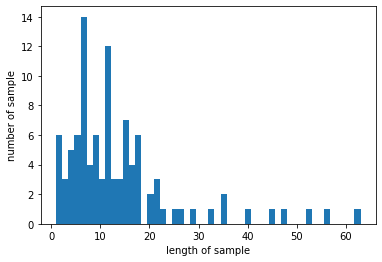

In [ ]:
# 최대길이
max_len = max(len(l) for l in encoded) # 문장(리뷰)의 최대 길이 -> 단어가 가장 많은 문장의 단어 수
print(f'리뷰의 최대 길이 : {max_len}')
print(f'리뷰의 최소 길이 : {min(len(l) for l in encoded)}')
print(f'리뷰의 평균 길이 : {(sum(map(len, encoded)) / len(encoded))}')
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')

In [ ]:
# 가장 길이가 긴 리뷰의 길이로 통일
for line in encoded:
    if len(line) < max_len: # 현재 조회하는 샘플(문장, 단어 토큰화)이 정해준 길이보다 짧다면 
        line += [word_to_index['pad']] * (max_len - len(line))

리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 63
리뷰의 평균 길이 : 63.0


Text(0, 0.5, 'number of sample')

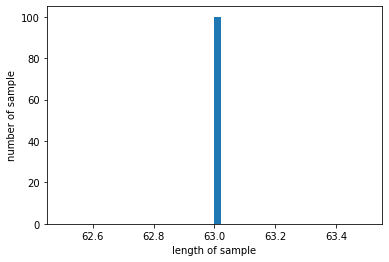

In [ ]:
# 최대길이
max_len = max(len(l) for l in encoded) # 문장(리뷰)의 최대 길이 -> 단어가 가장 많은 문장의 단어 수
print(f'리뷰의 최대 길이 : {max_len}')
print(f'리뷰의 최소 길이 : {min(len(l) for l in encoded)}')
print(f'리뷰의 평균 길이 : {(sum(map(len, encoded)) / len(encoded))}')
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')

In [ ]:
encoded[:5]

[[78,
  27,
  9,
  4,
  50,
  41,
  79,
  16,
  28,
  29,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [188,
  5,
  80,
  189,
  190,
  191,
  42,
  192,
  114,
  5,
  193,
  194,
  21,
  115,
  195,
  196,
  13,
  51,
  81,
  116,
  30,
  42,
  197,
  117,
  118,
  31,
  198,
  5,
  199,
  200,
  17,
  114,
  7,
  82,
  52,
  17,
  43,
  201,
  5,
  202,
  4,
  203,
  14,
  7,
  83,
  32,
  204,
  84,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [205,
  119,
  206,
  53,
  207,
  31,
  208,
  209,
  54,
  10,
  25,
  11,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1

# 워드클라우드

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (46.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [ ]:
!sudo find / -name *Gothic.ttf

find: ‘/proc/60/task/60/net’: Invalid argument
find: ‘/proc/60/net’: Invalid argument
/usr/share/fonts/truetype/nanum/NanumGothic.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
sample_data = df.head(1000).copy() 
tokenizer = Mecab()
tokenized = []
for sentence in sample_data.document:
    temp = tokenizer.nouns(str(sentence)) # 형태소 기반 토큰화
    temp = [word for word in temp if len(word) > 1] # 1글자 이하 제거
    tokenized.append(temp)
    # 문장 중 2글자 이상의 명사만 추출

In [ ]:
tokenized

[[],
 ['디자인',
  '학생',
  '외국',
  '디자이너',
  '전통',
  '발전',
  '문화',
  '산업',
  '우리',
  '나라',
  '시절',
  '열정',
  '노라노',
  '전통',
  '사람',
  '감사'],
 ['폴리스', '스토리', '시리즈', '하나', '최고'],
 ['연기', '생각', '몰입', '영화'],
 ['안개', '밤하늘', '초승달', '영화'],
 ['사랑', '사람', '처음', '영화'],
 ['감동', '감동'],
 ['전쟁'],
 [],
 ['바보'],
 ['나이', '영화', '감동', '훗날', '보면대', '하나', '하나', '감정', '완벽', '이해'],
 [],
 ['고질라', '니무'],
 ['영화', '오페라', '작품', '극단', '평갈'],
 ['반전'],
 ['평점', '긴장감', '스릴감', '최고', '전장', '공포'],
 ['고시', '이터', '소재', '관련'],
 ['최고'],
 ['밀회', '화이팅'],
 ['상당', '수작', '일본', '영화', '최고', '마음', '임팩트', '일품'],
 ['오랜만', '범죄', '스릴러'],
 ['사랑', '마디', '교복', '자이', '볼펜', '자국', '마음', '형태'],
 ['마지막'],
 ['강압', '용서', '세뇌', '용서', '비판'],
 ['중세', '시대', '명작', '평점'],
 ['시간',
  '영상',
  '존재',
  '제니퍼코넬리',
  '아역',
  '시절',
  '로버트드니로',
  '마지막',
  '장면',
  '가슴',
  '기억',
  '최고',
  '명작'],
 ['사람'],
 ['인간', '잠재', '악마', '시간', '공간', '존속', '다큐', '그것', '광적', '재현'],
 ['최고', '동안', '여운'],
 ['실화', '충격', '어디', '경각심', '영화'],
 ['작품', '가치'],
 ['농아', '문화'],
 ['이거', '이정재', '이

In [ ]:
vocab = FreqDist(np.hstack(tokenized))
vocab_size = 200
vocab = vocab.most_common(vocab_size)

In [ ]:
vocab

[('영화', 371),
 ('최고', 88),
 ('연기', 65),
 ('감동', 58),
 ('생각', 45),
 ('드라마', 33),
 ('사람', 32),
 ('하나', 28),
 ('사랑', 28),
 ('재미', 27),
 ('평점', 26),
 ('명작', 26),
 ('스토리', 25),
 ('마음', 25),
 ('마지막', 25),
 ('이거', 23),
 ('작품', 22),
 ('남자', 21),
 ('배우', 21),
 ('한국', 20),
 ('현실', 20),
 ('추천', 19),
 ('액션', 18),
 ('매력', 17),
 ('장면', 15),
 ('이야기', 15),
 ('기대', 15),
 ('감독', 15),
 ('우리', 13),
 ('시절', 13),
 ('느낌', 13),
 ('강추', 13),
 ('내용', 13),
 ('음악', 13),
 ('정도', 12),
 ('연기력', 12),
 ('이해', 11),
 ('시간', 11),
 ('대박', 11),
 ('인생', 11),
 ('자신', 11),
 ('모습', 11),
 ('개인', 11),
 ('시리즈', 10),
 ('인간', 10),
 ('가족', 10),
 ('주인공', 10),
 ('이상', 10),
 ('나라', 9),
 ('몰입', 9),
 ('기억', 9),
 ('여운', 9),
 ('때문', 9),
 ('무엇', 9),
 ('처음', 8),
 ('전쟁', 8),
 ('당시', 8),
 ('이건', 8),
 ('지금', 8),
 ('뭔가', 8),
 ('노래', 8),
 ('코믹', 8),
 ('여자', 8),
 ('감정', 7),
 ('오페라', 7),
 ('소재', 7),
 ('후회', 7),
 ('캐릭터', 7),
 ('눈물', 7),
 ('배경', 7),
 ('제목', 7),
 ('웃음', 7),
 ('표현', 7),
 ('만점', 7),
 ('코미디', 7),
 ('기분', 7),
 ('필요', 7),
 ('그녀', 7),
 ('연출

In [ ]:
vocab = FreqDist(np.hstack(tokenized))
# vocab_size = 200
# vocab = vocab.most_common(vocab_size)

In [ ]:
# https://amueller.github.io/word_cloud/
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      random_state=16, width=480, height=480,
                      max_font_size=50).generate_from_frequencies(vocab)

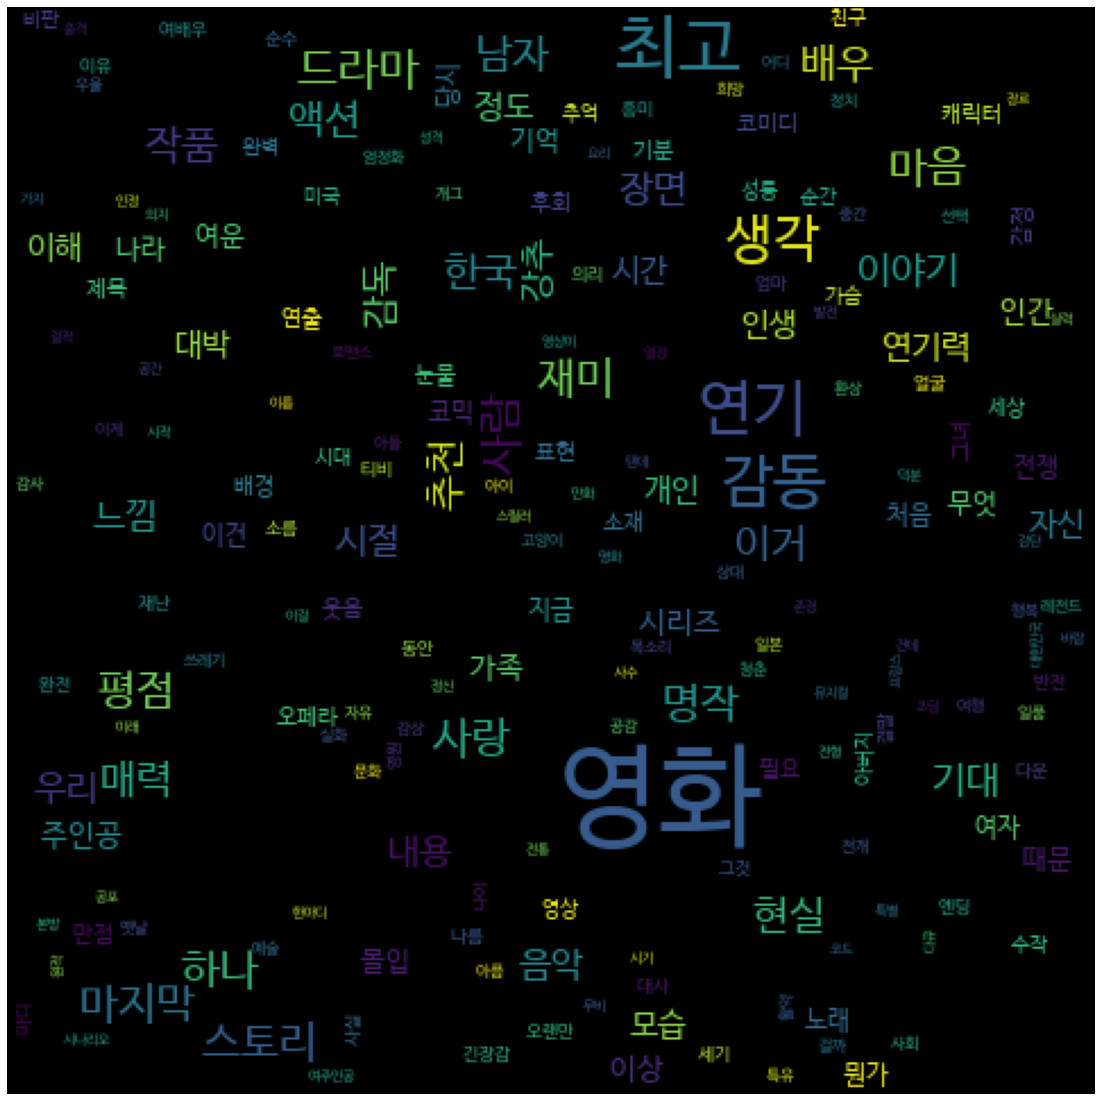

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# https://amueller.github.io/word_cloud/
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      random_state=16, width=480, height=480,background_color='white',
                      max_font_size=50).generate_from_frequencies(vocab)

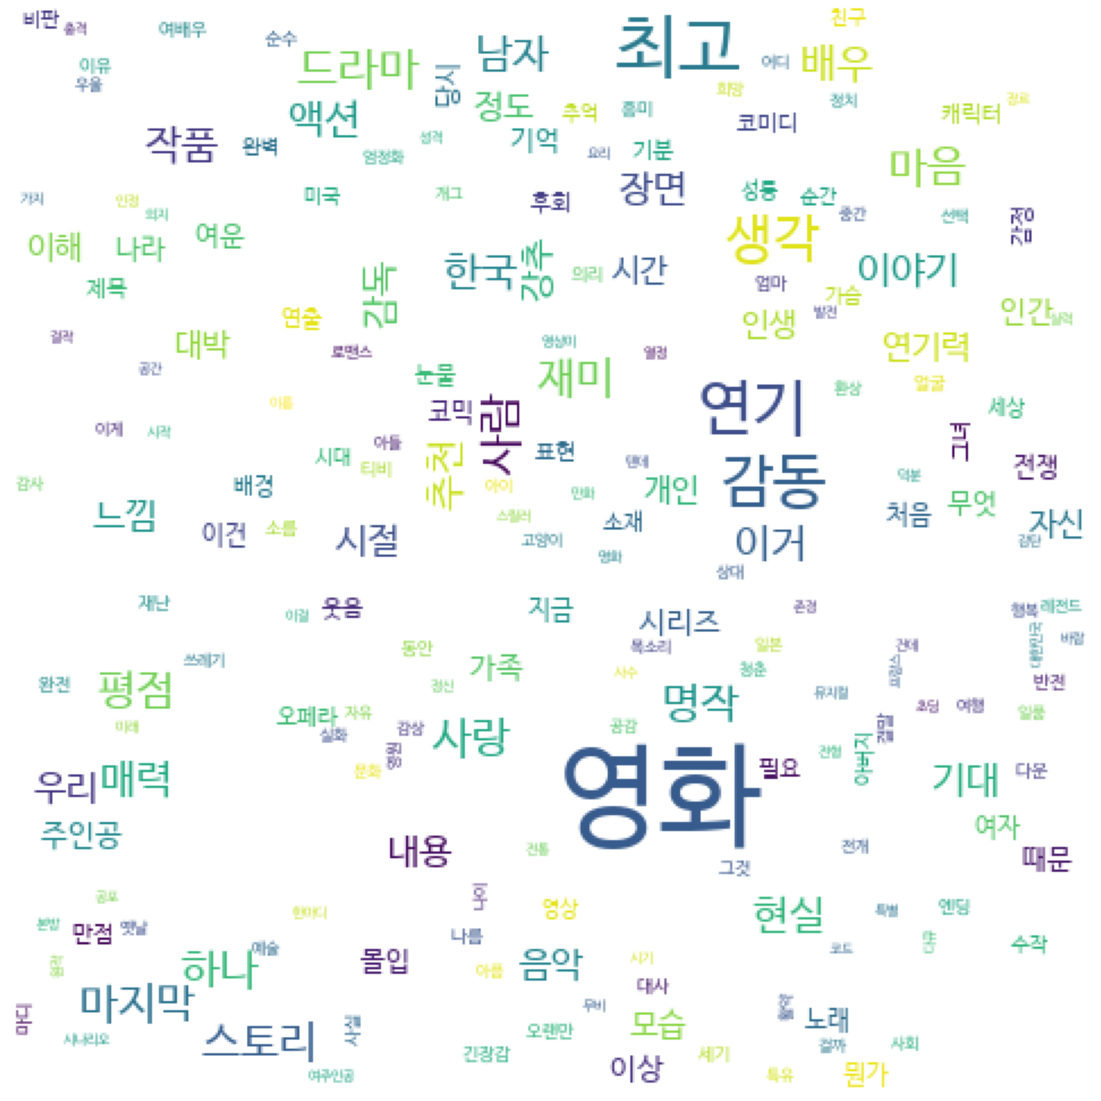

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# https://i.imgur.com/3qa3hO1.jpg
!wget https://i.imgur.com/3qa3hO1.jpg

--2023-01-16 06:26:33--  https://i.imgur.com/3qa3hO1.jpg
Resolving i.imgur.com (i.imgur.com)... 199.232.148.193
Connecting to i.imgur.com (i.imgur.com)|199.232.148.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17094 (17K) [image/jpeg]
Saving to: ‘3qa3hO1.jpg’

3qa3hO1.jpg         100%[===================>]  16.69K  --.-KB/s    in 0s      

2023-01-16 06:26:33 (80.7 MB/s) - ‘3qa3hO1.jpg’ saved [17094/17094]



In [ ]:
!ls

3qa3hO1.jpg  install_mecab-ko_on_colab190912.sh		LICENSE
images	     install_mecab-ko_on_colab_light_220429.sh	README.md


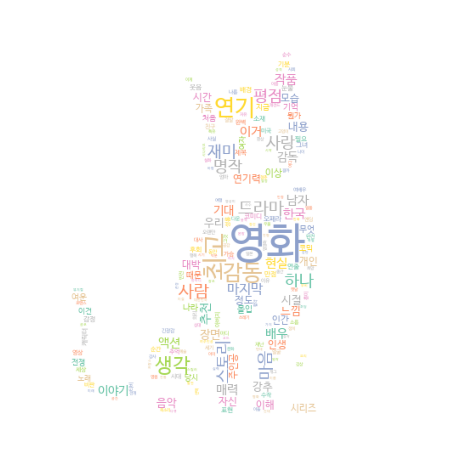

In [ ]:
from PIL import Image # 파이썬 이미지 불러오기

cat_mask = np.array(Image.open('3qa3hO1.jpg'))

wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      mask=cat_mask,
                      collocations=False,
                      random_state=16, width=480, height=480, colormap='Set2',
                      background_color='white',
                      max_font_size=50).generate_from_frequencies(vocab)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# 아이콘?에 사진 받아서 그 안쪽을 글로 채워줌

In [ ]:
# https://i.imgur.com/3qa3hO1.jpg
!wget https://i.imgur.com/1076928.png

--2023-01-16 06:45:50--  https://i.imgur.com/1076928.png
Resolving i.imgur.com (i.imgur.com)... 199.232.148.193
Connecting to i.imgur.com (i.imgur.com)|199.232.148.193|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://i.imgur.com/removed.png [following]
--2023-01-16 06:45:50--  https://i.imgur.com/removed.png
Reusing existing connection to i.imgur.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 503 [image/png]
Saving to: ‘1076928.png’

1076928.png         100%[===================>]     503  --.-KB/s    in 0s      

2023-01-16 06:45:50 (44.7 MB/s) - ‘1076928.png’ saved [503/503]



In [ ]:
!ls

1076928.png    images					  LICENSE
3qa3hO1.jpg    install_mecab-ko_on_colab190912.sh	  README.md
3qa3hO1.jpg.1  install_mecab-ko_on_colab_light_220429.sh


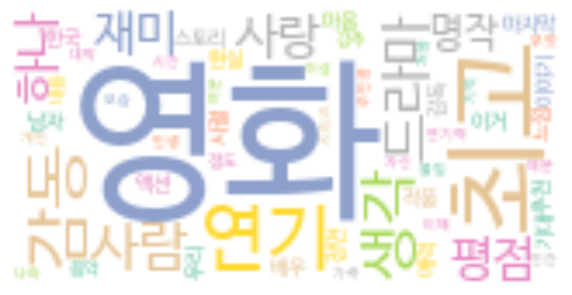

In [ ]:
from PIL import Image # 파이썬 이미지 불러오기

# cat_mask = np.array(Image.open('3qa3hO1.jpg'))
cat_mask = np.array(Image.open('1076928.png'))

wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      mask=cat_mask,
                      collocations=False,
                      random_state=16, width=480, height=480, colormap='Set2',
                      background_color='white',
                      max_font_size=50).generate_from_frequencies(dict(vocab))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pwd

/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
